# kaggle Dataset 전처리
data 
- train_X: 2d_images
- train_Y: 2d_masks  



In [1]:
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize
import matplotlib.pyplot as plt

In [2]:
# glob 모듈의 glob 메소드 : 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환
# * : 임의 길이의 모든 문자열을 의미
# img_list : 2d_images 폴더 내 이미지 파일 경로 리스트
# mask_list : 2d_masks 폴더 내 이미지 파일 경로 리스트
img_list = sorted(glob.glob('./dataset/kaggle_data/2d_images/*.tif'))
mask_list = sorted(glob.glob('./dataset/kaggle_data/2d_masks/*.tif'))

print(len(img_list), len(mask_list)) # 파일 개수

267 267


In [3]:
# 리스트 내용 확인
img_list[0]

'./dataset/kaggle_data/2d_images\\ID_0000_Z_0142.tif'

In [4]:
# 이미지 데이터 확인
img_tmp = imread(img_list[0])
print('type:', type(img_tmp))
print('shape: ', img_tmp.shape)
print(img_tmp)

type: <class 'numpy.ndarray'>
shape:  (512, 512)
[[-819 -852 -839 ... -902 -742 -777]
 [-759 -768 -748 ... -899 -896 -840]
 [-772 -857 -864 ... -723 -732 -834]
 ...
 [-759 -818 -862 ... -738 -784 -733]
 [-702 -842 -715 ... -760 -884 -920]
 [-831 -772 -831 ... -748 -765 -745]]


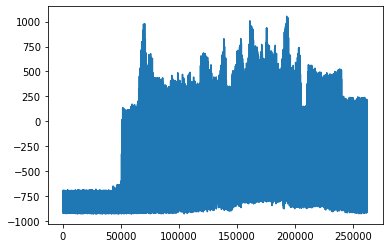

In [15]:
# 컬러값 분포 확인
arr_tmp = [j for i in imread(img_list[0]) for j in i]
plt.plot(arr_tmp)

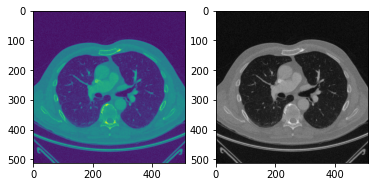

In [16]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_tmp) # 이미지 데이터 값 그대로
ax[1].imshow(img_tmp, cmap='gray') # grayscale로 보여줌

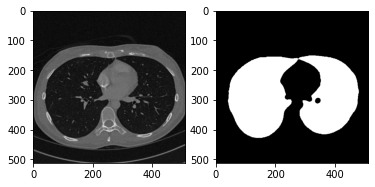

In [7]:
# 수정 코드 - jmin
IMG_SIZE = imread(img_list[0]).shape #(512,512)

x_data, y_data = np.empty((2, len(img_list), *IMG_SIZE, 1), dtype=np.float32)

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(*IMG_SIZE, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
    img = resize(img, output_shape=(*IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img
    
y_data /= 255.

fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_data[12].squeeze(), cmap='gray') # squeeze() : 차원 수 줄임
ax[1].imshow(y_data[12].squeeze(), cmap='gray')

In [8]:
# 빵형님꺼와 구분하기위해 파일명에 01 붙임
# *.npy : numpy array를 파일로 저장
# train, validation = 9:1 로 저장

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)

np.save('dataset/x_train_01.npy', x_train)
np.save('dataset/y_train_01.npy', y_train)
np.save('dataset/x_val_01.npy', x_val)
np.save('dataset/y_val_01.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 512, 512, 1) (240, 512, 512, 1)
(27, 512, 512, 1) (27, 512, 512, 1)
